In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC

In [10]:
x_tra=pd.read_csv("bow_train.csv")
x_te=pd.read_csv("bow_test.csv")
label_train=pd.read_csv("labels_train.csv")
label_test=pd.read_csv("labels_test.csv")

In [32]:
y_train=label_train["categoria"].values
y_test=label_test["categoria"].values

# Máquina de soporte vectorial

In [19]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best Kernel:',GS.best_estimator_.kernel)
print('Best Gamma:',GS.best_estimator_.gamma)

Best score: 0.865625
Best C: 0.1
Best Kernel: linear
Best Gamma: auto_deprecated


# Regresión Logística

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'C': [0.01, 0.1, 1, 10, 100], "solver": ["lbfgs","newton-cg","sag","saga"]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best solver:',GS.best_estimator_.solver)

Best score: 0.928125
Best C: 1
Best solver: lbfgs


C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

# Árboles de clasificación

In [15]:
from sklearn.tree import DecisionTreeClassifier

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'max_depth': np.arange(1, 20), 'min_samples_split': [2, 3, 4], "criterion": ["entropy","gini"]}
]

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best depth:',GS.best_estimator_.max_depth)
print('Best samples_split:',GS.best_estimator_.min_samples_split)
print('Best criterion:',GS.best_estimator_.criterion)



Best score: 0.865625
Best depth: 18
Best samples_split: 2
Best criterion: gini


# Ada boost

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


parameters = {'n_estimators': np.arange(1,1000,10)}

DTC = DecisionTreeClassifier(random_state = 42,max_depth=9
                             ,min_samples_split=2,criterion="gini")
ABC = AdaBoostClassifier(base_estimator = DTC)

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=ABC, param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

Best score: 0.934375


{'n_estimators': 871}

In [35]:
DTC = DecisionTreeClassifier(random_state = 67,max_depth=9
                             ,min_samples_split=2,criterion="gini")
ABC = AdaBoostClassifier(base_estimator = DTC,n_estimators=441)
ABC.fit(x_tra,y_train)
y_predic=ABC.predict(x_te)
np.sum(y_predic==y_test)/y_test.shape*100

array([85.])

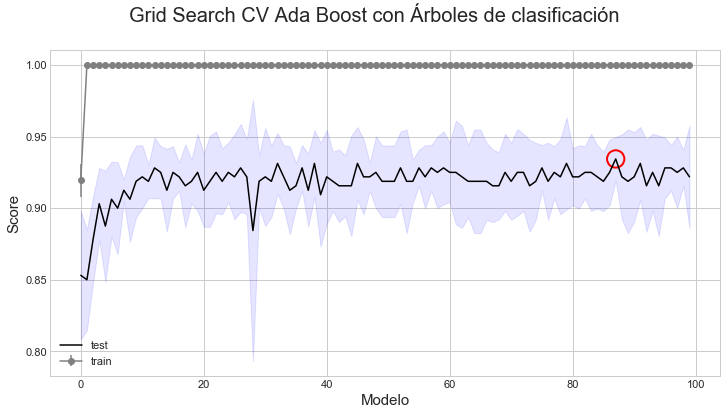

In [24]:
scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV Ada Boost con Árboles de clasificación',size=20)
plt.legend(loc="best");

# MLP Classifier

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'max_iter': np.arange(1000,2000,200), 
              'alpha': 10.0 ** -np.arange(1, 6),'hidden_layer_sizes':np.arange(10, 15)
             }

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(MLPClassifier(solver='lbfgs',random_state=42), cv=cvfolds, param_grid=parameters, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

Best score: 0.8875


{'alpha': 0.0001, 'hidden_layer_sizes': 11, 'max_iter': 1000}